In [106]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import delayed

In [107]:
from imblearn.over_sampling import SMOTE

In [243]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")


In [109]:
sub_df = pd.read_csv('SampleSubmission (3).csv')


In [5]:
train_df.shape

(7736, 21)

In [110]:
for i in train_df.columns:
  
  print('\n')
  
  print(i,train_df[i].nunique())

  print(i,train_df[i].unique())



ID 7736
ID ['ID_00008683' 'ID_00061163' 'ID_00071403' ... 'ID_99981803' 'ID_99983083'
 'ID_99985643']


gender 1
gender ['Female']


age 85
age [ 20  42  86  26  45  21  75  23  17  33  52  78  34  79  41  66  64  43
  29  61  47  59  22  19  46  25  28  54  49  40  69  57  51  81  60  31
  39  48  63  27  36  30  76  53  88  18  38  32  65  73  35  24  37  70
  55  50  56  74  67  89  44  58  62  16  77  68  80  72  83  71  84  85
  90  82  87  98  92  91  96  93  95  94  99  97 102]


race 4
race ['Black African' 'Indian/Asian' 'White' 'Coloured']


dwelling 13
dwelling ['Dwelling/house or brick/concrete block structure on a separate stand or yard or farm'
 'Town house (semi-detached house in complex)'
 'Room/flat let on a property or a larger dwelling/servants quarters/granny flat'
 'Informal dwelling/shack in backyard'
 'Flat or apartment in a block of flats'
 'Traditional dwelling/hut/structure made of traditional materials'
 'Dwelling/house/flat/room in backyard'
 'Informal dwe

In [112]:
selected_col = train_df.select_dtypes(include='object').columns.to_list()


no_info = ['Not applicable', 'Unspecified', 'Do not know']

selected_col

['ID',
 'gender',
 'race',
 'dwelling',
 'dwelling_type',
 'province_code',
 'metro_code',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'Education',
 'lw_work',
 'lw_business',
 'help_on_household',
 'job_or_business',
 'nature_of_work']

In [113]:
print("Answers with 'Not applicable', 'Unspecified', 'Do not know'")
for col in selected_col:

    print(col, ':', len(train_df[train_df[col].isin(no_info)]))
print(len(train_df))

Answers with 'Not applicable', 'Unspecified', 'Do not know'
ID : 0
gender : 0
race : 0
dwelling : 98
dwelling_type : 108
province_code : 0
metro_code : 0
nationality : 81
RTH : 1
marital_st : 16
Lang_inside : 33
Lang_outside : 33
Education : 551
lw_work : 12
lw_business : 12
help_on_household : 26
job_or_business : 3209
nature_of_work : 4687
7736


- add unspecified, not applicable and do not know together
- what to do with unspecified values

In [114]:
corr = train_df.corr()
corr.sort_values(['target'], ascending = False, inplace = True)
corr['target'].head()

target    1.000000
psu      -0.046302
age      -0.085340
Name: target, dtype: float64

In [ ]:
train_df.dtypes

In [115]:
# Categorical columns

selected_col = train_df.select_dtypes(include='object').columns.to_list()
selected_col

['ID',
 'gender',
 'race',
 'dwelling',
 'dwelling_type',
 'province_code',
 'metro_code',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'Education',
 'lw_work',
 'lw_business',
 'help_on_household',
 'job_or_business',
 'nature_of_work']

In [116]:
data = pd.concat([train_df, test_df])

In [117]:
# Change to no_info
data.replace(no_info, 'no info', inplace = True)



In [119]:

replace_colums=['dwelling',
 'dwelling_type',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'lw_work',
 'help_on_household']

for column in replace_colums:
     data[column].replace(no_info, data[column].mode()[0], inplace = True)

In [121]:
print("Answers with 'Not applicable', 'Unspecified', 'Do not know'")
for col in selected_col:

    print(col, ':', len(data[data[col].isin(no_info)]))
print(len(data))

Answers with 'Not applicable', 'Unspecified', 'Do not know'
ID : 0
gender : 0
race : 0
dwelling : 0
dwelling_type : 0
province_code : 0
metro_code : 0
nationality : 0
RTH : 0
marital_st : 0
Lang_inside : 0
Lang_outside : 0
Education : 0
lw_work : 0
lw_business : 0
help_on_household : 0
job_or_business : 0
nature_of_work : 0
11052


In [122]:
selected_col.pop(0)
selected_col

['gender',
 'race',
 'dwelling',
 'dwelling_type',
 'province_code',
 'metro_code',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'Education',
 'lw_work',
 'lw_business',
 'help_on_household',
 'job_or_business',
 'nature_of_work']

In [123]:

data = pd.get_dummies(data, columns = selected_col)

In [124]:
data.drop(['gender_Female'], axis=1, inplace = True)

In [125]:
# SPLIT

train = data[:len(train_df)]
test = data[len(train_df):]

In [126]:
test.drop(['target'], axis=1, inplace = True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [127]:
test.drop(['ID'], axis=1, inplace = True)

In [128]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['ID', 'target'], axis=1),
    train['target'],
    test_size=0.3,
    random_state=SEED)

In [129]:
col_names = X_train.columns

In [130]:
col_names

Index(['age', 'psu', 'race_Black African', 'race_Coloured',
       'race_Indian/Asian', 'race_White', 'dwelling_Caravan/tent',
       'dwelling_Cluster house in complex',
       'dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm',
       'dwelling_Dwelling/house/flat/room in backyard',
       ...
       'help_on_household_no info', 'job_or_business_No',
       'job_or_business_Yes', 'job_or_business_no info',
       'nature_of_work_A fixed period contract', 'nature_of_work_Casual',
       'nature_of_work_Permanent', 'nature_of_work_Seasonal',
       'nature_of_work_Temporary', 'nature_of_work_no info'],
      dtype='object', length=148)

In [131]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_test_eg_std = scaler.transform(test)
target = train['target']

In [132]:
X_train_std_df = pd.DataFrame(X_train_std, columns=col_names)
X_test_std_df = pd.DataFrame(X_test_std, columns=col_names)
X_test_eg_std_df = pd.DataFrame(X_test_eg_std, columns=col_names)

In [65]:
# Features = [c for c in train.columns if c not in ['ID', 'target']]
# target = train['target']

# min_max_scaler = MinMaxScaler()
# x = min_max_scaler.fit_transform(train[Features])
# x_test = min_max_scaler.fit_transform(test[Features])

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from imblearn.pipeline import make_pipeline 

In [89]:
models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))
base_model_train = []
base_model_test = []
for name, classifier in models:
    scores = cross_val_score(classifier, X_train_std_df, y_train, cv=5, scoring='recall')
    base_model_train.append(scores.mean().round(4))
    print(scores)
    print('{}: Avg CV recall using all features on training data: {}'.format(name, scores.mean().round(4)))
    
    classifier.fit(X_train_std_df, y_train)
    y_preds = classifier.predict(X_test_std_df)
    test_recall = recall_score(y_test, y_preds, average='binary')
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    base_model_test.append(test_recall.round(4))
    print('{}: Recall w/all features on test data {}:'.format(name, test_recall.round(4)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')

[0. 0. 0. 0. 0.]
log_reg: Avg CV recall using all features on training data: 0.0
log_reg: Recall w/all features on test data 0.0:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2129
         1.0       0.00      0.00      0.00       192

    accuracy                           0.92      2321
   macro avg       0.46      0.50      0.48      2321
weighted avg       0.84      0.92      0.88      2321

[[2126    3]
 [ 192    0]]
-------------------------------------------------------
[0.         0.01204819 0.01204819 0.         0.        ]
rf_classifer: Avg CV recall using all features on training data: 0.0048
rf_classifer: Recall w/all features on test data 0.0052:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2129
         1.0       0.14      0.01      0.01       192

    accuracy                           0.92      2321
   macro avg       0.53      0.50      0.48      2321
we

In [134]:

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_std_sm, y_train_sm = sm.fit_resample(X_train_std_df, y_train)

model1_train = []
model1_test = []

classifier = GradientBoostingClassifier()

classifier.fit(X_train_std_sm, y_train_sm)

y_preds_gbc = classifier.predict_proba(X_test_eg_std_df)


In [135]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_std_sm, y_train_sm = sm.fit_resample(X_train_std_df, y_train)

model1_train = []
model1_test = []

classifier= GaussianNB()
classifier.fit(X_train_std_sm, y_train_sm)

y_preds_gnb = classifier.predict_proba(X_test_eg_std_df)

In [136]:
sub_df['target'] = y_preds_gnb[:,1]
sub_df.to_csv('submission_gnb.csv', index = False)

In [137]:
sub_df['target'] = y_preds_gbc[:,1]
sub_df.to_csv('submission_gbc.csv', index = False)

In [138]:
models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))

models_x = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_std_sm, y_train_sm = sm.fit_resample(X_train_std_df, y_train)

model1_train = []
model1_test = []
classifier = LogisticRegression(max_iter=10000, random_state=42)
pipeline = make_pipeline(sm, LogisticRegression(max_iter=10000, random_state=42))
classifier.fit(X_train_std_sm, y_train_sm)

y_preds = classifier.predict_proba(X_test_eg_std_df)



In [ ]:
models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))
base_model_train = []
base_model_test = []
y_preds = {}

model_x = []
model_x.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
for name, classifier in model_x:
    scores = cross_val_score(classifier, X_train_std_df, y_train, cv=5, scoring='recall')
    base_model_train.append(scores.mean().round(4))
    print(scores)
    print('{}: Avg CV recall using all features on training data: {}'.format(name, scores.mean().round(4)))
    
    classifier.fit(X_train_std_df, y_train)
    y_preds = classifier.predict(X_test_eg_std_df)

In [139]:
y_preds_x = y_preds[:,1]

In [140]:
sub_df['target'] = y_preds_x
sub_df.to_csv('submission_smote.csv', index = False)

In [40]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
rf_selector.fit(X_train_std_sm, y_train_sm)
feature_imp = pd.Series(rf_selector.feature_importances_, index=X_train_std_df.columns).sort_values(ascending=False)
feature_imp[:30]

age                                                                                              0.072853
psu                                                                                              0.065326
Education_Grade 12/Standard 10/Form 5/Matric (No Exemption)                                      0.053556
dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm    0.036934
RTH_Head/acting head                                                                             0.035049
marital_st_Single and have never been married/never lived together as husband/wife before        0.030660
Education_Grade 11/Standard 9/Form 4                                                             0.028543
Education_Grade 10/Standard 8/Form 3                                                             0.026013
RTH_Son/daughter/stepchild/adopted child of person 01                                            0.023756
marital_st_Married                            

In [82]:
pred_y_rf = rf_selector.predict_proba(X_test_eg_std_df)
y_preds_rf_x = pred_y_rf[:,1]

In [83]:
sub_df['target'] = y_preds_rf_x
sub_df.to_csv('submission_rf.csv', index = False)

In [141]:
clf_lr = LogisticRegression(max_iter=10000, random_state=SEED)
penalty = ['l1','l2']
C = [0.001,0.002,0.003,0.005,1,10,100,1000]
skf = StratifiedKFold(n_splits=5)
pipeline = make_pipeline(sm, clf_lr)
param_grid = dict(logisticregression__penalty=penalty,
                  logisticregression__C=C)
grid = GridSearchCV(pipeline, 
                    param_grid=param_grid,
                    scoring='recall', 
                    verbose=1, cv=skf)
grid_results = grid.fit(X_train_std_sm, y_train_sm) 
y_pred_lr = grid.predict_proba(X_test_eg_std_df)
print('Best Score: ', grid_results.best_score_)
print('Best Params: ', grid_results.best_params_)

Versions/3.7/lib/python3.7/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7

In [142]:
y_pred_lr = y_pred_lr[:,1]

In [143]:
sub_df['target'] = y_pred_lr
sub_df.to_csv('submission_lr_cv.csv', index = False)

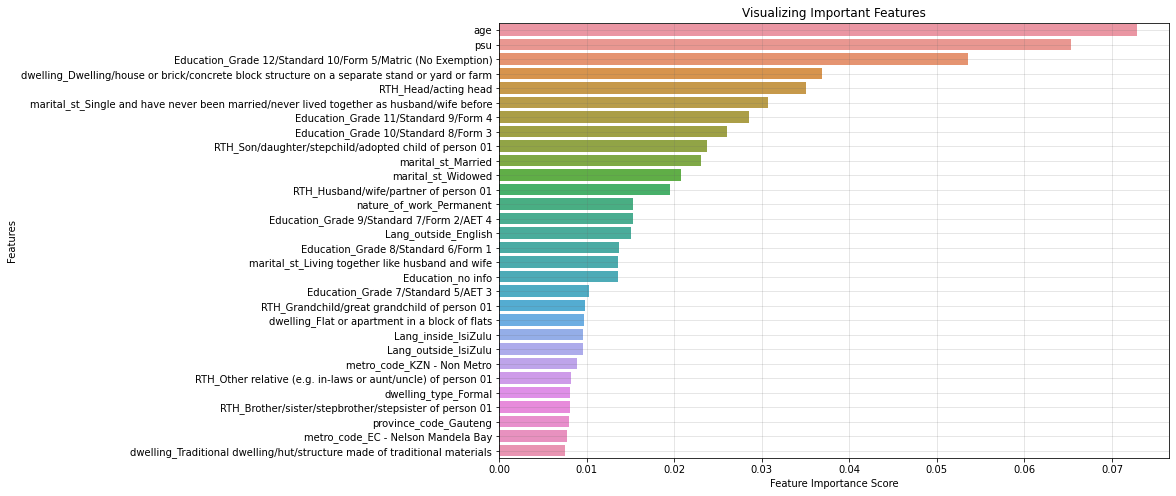

In [42]:
import matplotlib.pyplot as plt

X_train_rf = X_train_std_df[feature_imp[:30].index]
X_test_rf = X_test_std_df[feature_imp[:30].index]
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp[0:30], y=feature_imp.index[0:30])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.grid(b=False, which='major', color='#666666', linestyle='-', alpha=0.2)
plt.show()

In [43]:
models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))
model2_train = []
model2_test = []
for name, classifier in models:
    scores = cross_val_score(classifier, X_train_rf, y_train, cv=5, scoring='recall')
    model2_train.append(scores.mean().round(3))
    print(scores)
    print('{}: Avg CV Recall on RF Features: {}'.format(name, scores.mean().round(3)))
    
    classifier.fit(X_train_rf, y_train)
    y_preds = classifier.predict(X_test_rf)
    test_recall = recall_score(y_test, y_preds, average='binary')
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    model2_test.append(test_recall.round(3))
    print('{}: Recall w/RF features on test data {}:'.format(name, test_recall.round(3)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')


[0. 0. 0. 0. 0.]
log_reg: Avg CV Recall on RF Features: 0.0
log_reg: Recall w/RF features on test data 0.0:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2129
         1.0       0.00      0.00      0.00       192

    accuracy                           0.92      2321
   macro avg       0.46      0.50      0.48      2321
weighted avg       0.84      0.92      0.88      2321

[[2129    0]
 [ 192    0]]
-------------------------------------------------------
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetr

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
X_train_rf_sm, y_train_sm = sm.fit_resample(X_train_rf, y_train)
models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
skf = StratifiedKFold(n_splits=5)
model3_train = []
model3_test = []
for name, classifier in models:
    pipeline = make_pipeline(sm, classifier)
    scores = cross_val_score(pipeline, X_train_rf, y_train, cv=skf, scoring='recall')
    model3_train.append(scores.mean().round(3))
    print(scores)
    print('{}: Avg CV Recall w/RF Reatures: {}'.format(name, scores.mean().round(3)))
    
    classifier.fit(X_train_rf_sm, y_train_sm)
    y_preds = classifier.predict(X_test_rf)
    test_recall = recall_score(y_test, y_preds, average='binary')
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    model3_test.append(test_recall.round(3))
    print('{}: Recall w/RF on test data {}:'.format(name, test_recall.round(3)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')

[0.5060241  0.68674699 0.57831325 0.59756098 0.53658537]
log_reg: Avg CV Recall w/RF Reatures: 0.581
log_reg: Recall w/RF on test data 0.594:
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71      2129
         1.0       0.11      0.59      0.19       192

    accuracy                           0.57      2321
   macro avg       0.53      0.58      0.45      2321
weighted avg       0.87      0.57      0.67      2321

[[1216  913]
 [  78  114]]
-------------------------------------------------------
[0.02409639 0.06024096 0.02409639 0.07317073 0.04878049]
rf_classifer: Avg CV Recall w/RF Reatures: 0.046
rf_classifer: Recall w/RF on test data 0.057:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2129
         1.0       0.13      0.06      0.08       192

    accuracy                           0.89      2321
   macro avg       0.52      0.51      0.51      2321
weighted avg       0.85 

In [ ]:
clf = LogisticRegression( solver='lbfgs').fit(x, target)

y_pred = cls.predict_proba(x_test)

In [ ]:
y_pred = y_pred[:,1]

In [ ]:
test_pred = (1 - y_pred)
test_pred

In [ ]:
cls = RandomForestClassifier()
cls.fit(train[Features], target)

In [ ]:
rf_pred_y = cls.predict_proba(test[Features])

In [ ]:
rf_pred_y = rf_pred_y[:,1]

In [ ]:
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2)
print(pol)

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)])

p_fit = pip.fit(train[Features], target)
p_predict = pip.predict_proba(test[Features])

In [ ]:
p_predict

In [ ]:
sub_df['target'] = rf_pred_y
sub_df.to_csv('submission_rf.csv', index = False)

In [ ]:
sub_df['target'] = y_pred
sub_df.to_csv('submission_lr.csv', index = False)

# Cat boost


In [311]:
train_copy = train_df

In [312]:
test_copy = test_df

In [313]:
data_copy = pd.concat([train_copy, test_copy])

In [314]:
data_copy.replace(no_info, 'no info', inplace = True)

In [315]:

replace_colums=['dwelling',
 'dwelling_type',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'lw_work',
 'help_on_household']

for column in replace_colums:
     data_copy[column].replace(no_info, data_copy[column].mode()[0], inplace = True)



In [316]:

train_copy_x = data_copy[:len(train_copy)]
test_copy_x = data_copy[len(train_copy):]

In [317]:
col_copy = train_copy.select_dtypes(include='object').columns.to_list()
col_copy

['ID',
 'gender',
 'race',
 'dwelling',
 'dwelling_type',
 'province_code',
 'metro_code',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'Education',
 'lw_work',
 'lw_business',
 'help_on_household',
 'job_or_business',
 'nature_of_work']

In [318]:
from sklearn.metrics import accuracy_score
import random

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier ,Pool
from sklearn.model_selection import train_test_split

In [342]:
class CFG :
  catboost_params = {'loss_function':'Logloss', 'eval_metric':'AUC', 'learning_rate' :0.05,'iterations':10000,'random_seed':0,
                     'use_best_model':True,'verbose':100,'early_stopping_rounds':50,
                     }
  catfs    = ['gender',
 'race',
 'dwelling',
 'dwelling_type',
 'province_code',
 'metro_code',
 'nationality',
 'RTH',
 'marital_st',
 'Lang_inside',
 'Lang_outside',
 'Education',
 'lw_work',
 'lw_business',
 'help_on_household',
 'job_or_business',
 'nature_of_work']
  to_drop  = ['ID', 'target']
  tts_seed = 3031 
  tts_ts   = 0.2

In [343]:

def seed_env(seed = 0):
  '''SEED The envierment'''
  random.seed(seed)
  np.random.seed(seed)

In [344]:
features = [x for x in train_copy_x.columns if x not in CFG.to_drop]
len(features)

19

In [345]:
train_df.dtypes

ID                   object
gender               object
age                   int64
race                 object
dwelling             object
dwelling_type        object
province_code        object
metro_code           object
psu                   int64
nationality          object
RTH                  object
marital_st           object
Lang_inside          object
Lang_outside         object
Education            object
lw_work              object
lw_business          object
help_on_household    object
job_or_business      object
nature_of_work       object
target                int64
dtype: object

In [346]:
X = train_copy_x[features]
y = train_copy_x.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = CFG.tts_ts,random_state=CFG.tts_seed,stratify=y)

In [347]:
X.dtypes


gender               object
age                   int64
race                 object
dwelling             object
dwelling_type        object
province_code        object
metro_code           object
psu                   int64
nationality          object
RTH                  object
marital_st           object
Lang_inside          object
Lang_outside         object
Education            object
lw_work              object
lw_business          object
help_on_household    object
job_or_business      object
nature_of_work       object
dtype: object

In [348]:
def Catboost(X_train, X_test, y_train, y_test,categorical_features) :
  seed_env()

  model = CatBoostClassifier(**CFG.catboost_params)
  model.fit(Pool(X_train,y_train,cat_features = categorical_features),
            eval_set = Pool(X_test,y_test,cat_features = categorical_features),
            early_stopping_rounds=200)
  
  pred = model.predict_proba(X_test)
  return pred , model

In [349]:
_ , model = Catboost(X_train, X_test, y_train, y_test,CFG.catfs)

0:	test: 0.5660346	best: 0.5660346 (0)	total: 53.8ms	remaining: 8m 58s
100:	test: 0.6485055	best: 0.6485055 (100)	total: 2.17s	remaining: 3m 33s
200:	test: 0.6534659	best: 0.6540103 (197)	total: 4.92s	remaining: 3m 59s
300:	test: 0.6561242	best: 0.6584640 (237)	total: 7.54s	remaining: 4m 2s
400:	test: 0.6465625	best: 0.6584640 (237)	total: 10.5s	remaining: 4m 10s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6584639798
bestIteration = 237

Shrink model to first 238 iterations.


In [350]:
y_pred = model.predict_proba(test_copy_x[features])

In [351]:
y_pred_cat = y_pred[:,1]

In [352]:
sub_df['target'] = y_pred_cat
sub_df.to_csv('submission_cat.csv', index = False)

In [367]:
from sklearn.model_selection import KFold
import time
import xgboost as xgb

param = {'min_child_weight': 50, 'eta': 0.005, 'colsample_bytree': 0.8, 'max_depth': 7,
            'subsample': 0.75, 'lambda': 2, 'nthread': -1,  'silent': 1, 'gamma' : 0,
            'eval_metric': 'auc', 'objective': 'binary:logitraw'}    

features = [x for x in train.columns if x not in ['ID', 'target']]
target = train['target']

folds = KFold(n_splits = 5, shuffle = True, random_state = 15)
oof_xgb = np.zeros(len(train))
predictions_xgb = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_copy_x.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = xgb.DMatrix(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = xgb.DMatrix(train.iloc[val_idx][features], label=target.iloc[val_idx])
    test_data = xgb.DMatrix(test[features].values)

    num_round = 20000
    clf = xgb.train(param, trn_data, num_round, [(trn_data, 'train'), (val_data, 'valid')], verbose_eval=100, early_stopping_rounds = 500)
    oof_xgb[val_idx] = clf.predict(val_data)

    predictions_xgb += clf.predict_proba(xgb.DMatrix(test[features])) / folds.n_splits
    
print("CV score: {:<8.5f}".format(mean_squared_error(oof_xgb, target)**0.5))

fold n°0
[18:16:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.50000	valid-auc:0.50000
[100]	train-auc:0.63532	valid-auc:0.63169
[200]	train-auc:0.65651	valid-auc:0.65478
[300]	train-auc:0.67105	valid-auc:0.65947
[400]	train-auc:0.67514	valid-auc:0.65840
[500]	train-auc:0.67673	valid-auc:0.65895
[600]	train-auc:0.67800	valid-auc:0.65916
[700]	train-auc:0.67911	valid-auc:0.66025
[800]	train-auc:0.68003	valid-auc:0.66059
[900]	train-auc:0.68161	valid-auc:0.66008
[1000]	train-auc:0.68336	valid-auc:0.66003
[1100]	train-auc:0.68545	valid-auc:0.66040
[1200]	train-auc:0.68733	valid-auc:0.66028
[1247]	train-auc:0.68852	valid-auc:0.66005


AttributeError: 'Booster' object has no attribute 'predict_proba'

In [370]:
features = [x for x in train.columns if x not in ['ID', 'target']]
target = train['target']

In [380]:
xgb_params = {
        'maxdepth':[8],
        'objective':['multi:softmax'],
        'n_estimators':[600, 900, 1200],
        'gamma':[0, .1, .2],
        'lambda':[.5, 1, 3],
        'alpha':[.5, 1, 2],
        'num_class':[3],
        #Other parameters
             }

xgb_clf = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid=xgb_params, scoring='accuracy', cv=4, verbose=1)

grid_search.fit(train[features], target)



ata_backend
    feature_names, feature_types)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py", line 243, in _from_pandas_df
    data, enable_categorical, feature_names, feature_types)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py", line 207, in _transform_pandas_df
    raise ValueError(msg + ', '.join(bad_fields))
ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.gender, race, dwelling, dwelling_type, province_code, metro_code, nationality, RTH, marital_st, Lang_inside, Lang_outside, Education, lw_work, lw_business, help_on_household, job_or_business, nature_of_work

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encod

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.gender, race, dwelling, dwelling_type, province_code, metro_code, nationality, RTH, marital_st, Lang_inside, Lang_outside, Education, lw_work, lw_business, help_on_household, job_or_business, nature_of_work

In [ ]:
y_pred_xgb = grid_search.predict_proba(test)

In [376]:
sub_df['target'] = xgb_y
sub_df.to_csv('submission_xgb.csv', index = False)